In [1]:
import tensorflow as tf                                                         
import numpy as np                                                             
import pandas as pd                                                             
import cv2                                                                      
from matplotlib import pyplot as plt                                            
from tensorflow.keras.utils import to_categorical                              

In [2]:
path = '../Desktop/arabic hand'  
x_train= pd.read_csv(path + '/csvTrainImages 13440x1024.csv', header=None)# Then we load the training images.
y_train = pd.read_csv(path + '/csvTrainLabel 13440x1.csv', header=None)    # Training labels.
x_test = pd.read_csv(path + '/csvTestImages 3360x1024.csv', header=None)   # Testing images.
y_test = pd.read_csv(path + '/csvTestLabel 3360x1.csv', header=None)       # Testing labels.

In [3]:
x_train.to_numpy()
x_test.to_numpy() 
y_train.to_numpy()-1
y_test.to_numpy()-1
 

array([[ 0],
       [ 0],
       [ 1],
       ...,
       [26],
       [27],
       [27]], dtype=int64)

In [4]:
def preprocess_data(x_train):
  x_train = x_train.to_numpy().reshape((x_train.shape[0], 32, 32)).astype('uint8')
  for i in range(len(x_train)):
    x_train[i] = cv2.rotate(x_train[i], cv2.ROTATE_90_CLOCKWISE)      # Rotating the images.
    x_train[i] = np.flip(x_train[i], 1)                               # Flipping the images
  x_train = x_train.reshape([-1, 32, 32, 1]).astype('uint8')          # Reshaping into the required size.
  x_train = x_train.astype('float32')/255                             # Here we normalize our images.
  return np.asarray(x_train)

In [5]:
x_train = preprocess_data(x_train)                                         # Returns an array of dimensions (13440,32,32,1).
x_test = preprocess_data(x_test) 

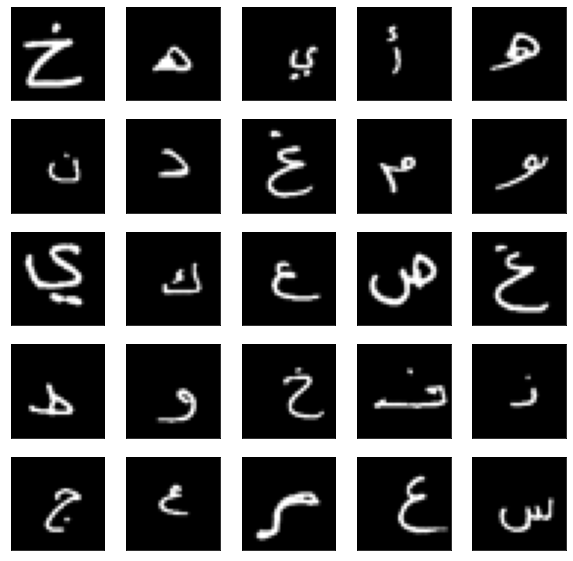

In [16]:
ra = np.random.randint(0, 13440, size=25)
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[ra[i]].reshape(32,32),"gray")
    
plt.show()

In [6]:
y_train = to_categorical(y_train.values.astype('int32') - 1                
                         , num_classes=28)
y_test = to_categorical(y_test.values.astype('int32') - 1                  
                        , num_classes=28)

In [7]:
from sklearn.utils import shuffle
x_train, y_train = shuffle(x_train, y_train)
x_test, y_test = shuffle(x_test, y_test)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation , Dense ,Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

In [9]:
optimizer = Adam(learning_rate=0.001, beta_1 = 0.9, beta_2 = 0.999, epsilon = 1e-07, amsgrad = False)

In [10]:
kernel_initializer='he_normal'
model = Sequential([
              Conv2D(32,(3,3),padding='same',input_shape=(32, 32, 1),activation='relu',kernel_initializer=kernel_initializer),
              MaxPooling2D(2,2),
              BatchNormalization(),
              Conv2D(64,(3,3),padding='same',activation='relu',kernel_initializer=kernel_initializer),
              MaxPooling2D(2,2),
              Dropout(0.2),
              BatchNormalization(),
              Conv2D(128,(3,3),padding='same',activation='relu',kernel_initializer=kernel_initializer),
              MaxPooling2D(2,2),
              Dropout(0.2),
              BatchNormalization(),
              Flatten(),
              Dense(32,activation='relu',kernel_initializer=kernel_initializer, kernel_regularizer='l2'),
              BatchNormalization(),
              Dropout(0.2),
              Dense(28,activation='softmax')
              
          ])

In [11]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 16, 16, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 8, 8, 64)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 64)          2

In [13]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test), batch_size = 32, epochs = 50)

Epoch 1/50
420/420 [==============================] - 38s 80ms/step - loss: 3.0176 - accuracy: 0.3167 - val_loss: 2.7191 - val_accuracy: 0.3250
Epoch 2/50
420/420 [==============================] - 30s 71ms/step - loss: 1.1321 - accuracy: 0.7573 - val_loss: 0.6038 - val_accuracy: 0.9048
Epoch 3/50
420/420 [==============================] - 30s 71ms/step - loss: 0.6910 - accuracy: 0.8581 - val_loss: 0.4423 - val_accuracy: 0.9315
Epoch 4/50
420/420 [==============================] - 29s 70ms/step - loss: 0.5308 - accuracy: 0.8958 - val_loss: 0.4737 - val_accuracy: 0.9033
Epoch 5/50
420/420 [==============================] - 29s 69ms/step - loss: 0.4717 - accuracy: 0.9039 - val_loss: 0.4077 - val_accuracy: 0.9327
Epoch 6/50
420/420 [==============================] - 28s 67ms/step - loss: 0.4229 - accuracy: 0.9220 - val_loss: 0.3449 - val_accuracy: 0.9503
Epoch 7/50
420/420 [==============================] - 22s 52ms/step - loss: 0.4039 - accuracy: 0.9265 - val_loss: 0.4543 - val_accuracy:

In [14]:
loss, accuracy = model.evaluate(x_test, y_test)

print('test set accuracy: ', accuracy * 100)

105/105 [==============================] - 2s 16ms/step - loss: 0.2894 - accuracy: 0.9643
test set accuracy:  96.42857313156128


In [15]:
pred = model.predict(x_test)
print(pred.shape)
pred = np.argmax(pred, axis=1)
print(pred)

(3360, 28)
[12 21  0 ...  8 13 19]


In [1]:
!pip install imutils

  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25860 sha256=a00f40cbd3af37754376e702f954bd04fc4eefe561d9369ca5e32c0641693156
  Stored in directory: c:\users\manal\appdata\local\pip\cache\wheels\59\1b\52\0dea905f8278d5514dc4d0be5e251967f8681670cadd3dca89
Successfully built imutils


In [16]:
import cv2
from imutils import contours

    
# Load image, grayscale, Otsu's threshold
image = cv2.imread('c.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU + cv2.THRESH_BINARY_INV)[1]

# Find contours, sort from left-to-right, then crop
cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
cnts, _ = contours.sort_contours(cnts, method="right-to-left")

# Filter using contour area and extract ROI
ROI_number = 0
for c in cnts:
    area = cv2.contourArea(c)
    if area > 10:
        x,y,w,h = cv2.boundingRect(c)
        if w /h > 1.25:
            # Split it in half into two letter regions
            h_w = int(w /2)
            ROI = image[y:y+h, x:x+h_w]
            tx = x + h_w
            cv2.rectangle(image, (x, y), (x + h_w , y + h), (36,255,12), 2)
            ROi = image[y:y+h, tx:tx+h_w]
            cv2.rectangle(image, (tx , y), (tx+h_w , y+ h), (36,255,12), 2)
            cv2.imwrite('ROI_{}.png'.format(ROI_number), ROi)
            ROI_number += 1
      
        else:
           
            ROI = image[y:y+h, x:x+w]
            cv2.rectangle(image, (x, y), (x + w , y + h), (36,255,12), 2) 
    cv2.imwrite('ROI_{}.png'.format(ROI_number), ROI)
    
    ROI_number += 1

#cv2.imshow('thresh', thresh)
cv2.imshow('image', image)
cv2.waitKey()

-1

In [17]:
from skimage import io
from keras.preprocessing import image
for i in range(ROI_number):
    img = image.load_img('ROI_{}.png'.format(i), grayscale=True, target_size=(32, 32))
    
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis = 0)
    #x = np.array(x, 'float32')
    x /= 255

    custom = model.predict(x)
    custom = np.argmax(custom, axis=1)
    print(custom)







Using TensorFlow backend.
C:\anaconda\lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


[15]
[14]
[15]
[25]
